# Face recognition using Eigenface Algorithm


# we use these stages:
   1- Image Loading: Load image data from files using Pillow (PIL) and convert it into NumPy arrays.

   2-Visualization: Display the 10th image from the training data set.

   3-Average Face Calculation: Compute the average face by averaging pixel values across all training images and visualize it.

   4-Mean Subtraction: Subtract the average face from each training image.

   5-PCA(Principal Component Analysis): Compute the pca of the mean-subtracted data to extract eigenfaces and display the first 10 eigenfaces.

   6-Dimensionality Reduction: Approximate the training data by reducing dimensionality and calculate the reconstruction error for different values of r.

   7-Accuracy Measurement: Train a logistic regression model with different r values, evaluate the model on the testing data, and plot the accuracy against r

    8-  recognized label for the specified image.

# step-1 Import and preprocess the Yale dataset:
we use Yale Face Database B, 10 persons pics each with 64 images under different lighting condition,
so totally we have 640 face images as data.

# step-2 Split data into training and test sets:
Load the training set into a matrix X: there are 540 training images in total, each has 50 × 50 pixels that need to be concatenated into a 2500-dimensional vector. 
    So the size of X should be 540 × 2500, where each row is a flattened face image.

In [ ]:
import os
import matplotlib.cm as cm
import numpy as np
from matplotlib import pylab as plt
from matplotlib import pyplot as plt1
from sklearn.linear_model import LogisticRegression
from PIL import Image
from sklearn.decomposition import PCA  # Import PCA from scikit-learn

def get_feature_matrix(path, num, average_face, eigen_face):
    testing_labels, testing_data = [], []

    with open(path) as f:
        for line in f:
            im = Image.open(line.strip().split()[0])
            im = np.array(im)
            testing_data.append(im.reshape(2500,))
            testing_labels.append(line.strip().split()[1])

    # Define empty lists for train_data and train_labels
train_data, train_labels = [], []

with open('faces/train.txt') as f:
    for line in f:
        im = Image.open(line.strip().split()[0])
        im = np.array(im)
        train_data.append(im.reshape(2500,))
        train_labels.append(line.strip().split()[1])

# Convert train_data and train_labels to NumPy arrays
train_data, train_labels = np.array(train_data, dtype=float), np.array(train_labels, dtype=int)

# step-3 visualize the 10th data point in a training dataset as an image. 
Visualization is a common and important step in machine learning and data analysis for several reasons

In [ ]:
plt.imshow(train_data[10, :].reshape(50, 50), cmap=cm.Greys_r)
plt.title('The 10th Data')

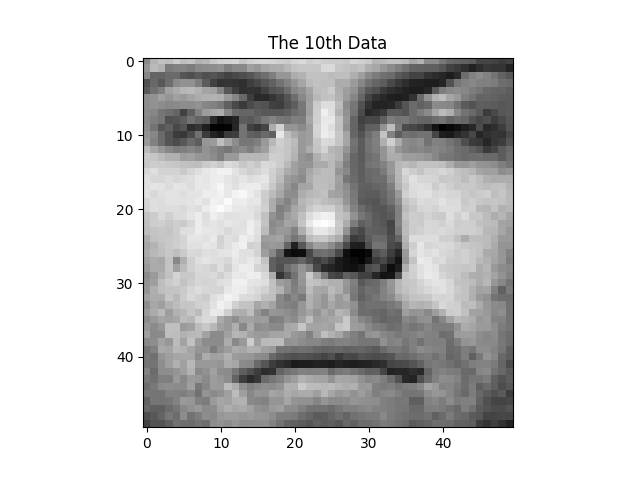

In [2]:
from PIL import Image
img = Image.open('tenth_data.png')
img


# step-4 calculate and visualize the average face from a set of training images

In [ ]:
average_face = np.mean(train_data, axis=0)

plt.figure()
plt.title('Average Face')
plt.imshow(average_face.reshape(50, 50), cmap=cm.Greys_r)

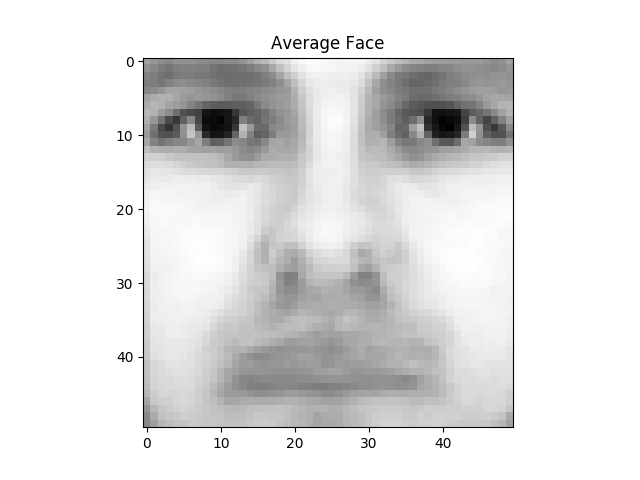

In [3]:
from PIL import Image
img = Image.open('average_face.png')
img

# step-5 mean subtracting from the training data and visualizing a "mean-subtracted face.

In [ ]:
mean_subtracted_data = train_data - average_face

plt.figure()
plt.title('Mean Subtracted Face')
plt.imshow(mean_subtracted_data[10, :].reshape(50, 50), cmap=cm.Greys_r)


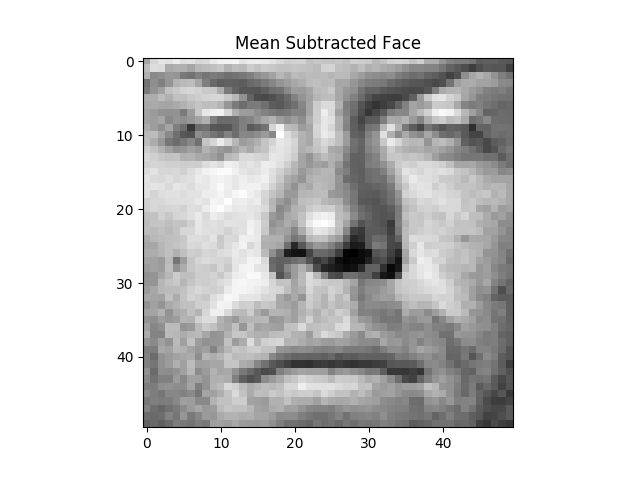

In [4]:
from PIL import Image
img = Image.open('mean_subtracted.png')
img

# step-6 - PCA (Principal Component Analysis)

focused on visualizing the top 10 eigenfaces from the mean-subtracted training data


In [ ]:
pca = PCA(n_components=10)
eigenfaces = pca.fit_transform(mean_subtracted_data)

plt.figure()
for i in range(10):
    plt.subplot(2, 5, i + 1)
    eigenface = pca.components_[i, :].reshape(50, 50)
    plt.imshow(eigenface, cmap=cm.Greys_r)
plt.title('Top 10 Eigen Faces')
plt.show()


# Let's break down the code:
1--- PCA Initialization:-
    pca = PCA(n_components=10)
we create a PCA object with n_components=10. 
This means we are performing PCA to reduce the dimensionality of the data to 10 principal components. These components will capture the most significant variation in the data.
2-----PCA Transformation:-
    eigenfaces = pca.fit_transform(mean_subtracted_data)
we apply PCA to our data (mean_subtracted_data) using the fit_transform method. This step calculates the principal components and projects the data into the new lower-dimensional space defined by these components.
3-----Visualization:
    plt.figure()
for i in range(10):
    plt.subplot(2, 5, i + 1)
    eigenface = pca.components_[i, :].reshape(50, 50)
    plt.imshow(eigenface, cmap=cm.Greys_r)
plt.title('Top 10 Eigen Faces')
plt.show()   In this section, we visualize the top 10 eigenfaces:

we create a figure for plotting.
In the loop, we iterate through the first 10 principal components (eigenfaces) obtained from PCA.
For each eigenface, we reshape it to match the dimensions of the original data (e.g., 50x50 for an image) and display it using plt.imshow.
The title of the plot is set as 'Top 10 Eigen Faces', and finally, the figure is shown.


    


    

# Mathematical Concepts in PCA:

1-Centering Data: In PCA, we typically center the data by subtracting the mean from each feature, as this ensures that the first principal component captures the direction of maximum variance.

2-PCA Components: The PCA components (eigenfaces) are orthogonal vectors that represent the directions in the feature space that capture the most variance in the data. The eigenvalues associated with these components indicate how much variance each component explains.

3-Dimensionality Reduction: By selecting only a subset of the principal components, you reduce the dimensionality of the data while preserving most of its important information. In this case, you've chosen to retain the top 10 eigenfaces.

4-Visualization: Visualizing the eigenfaces helps us to understand what the main features or patterns in the data are. These eigenfaces are essential in applications like face recognition, where they represent characteristic facial features.

The code is a practical example of using PCA for dimensionality reduction and understanding the main components in a dataset, particularly in the context of eigenfaces, which are essential in face recognition and related AI tasks.

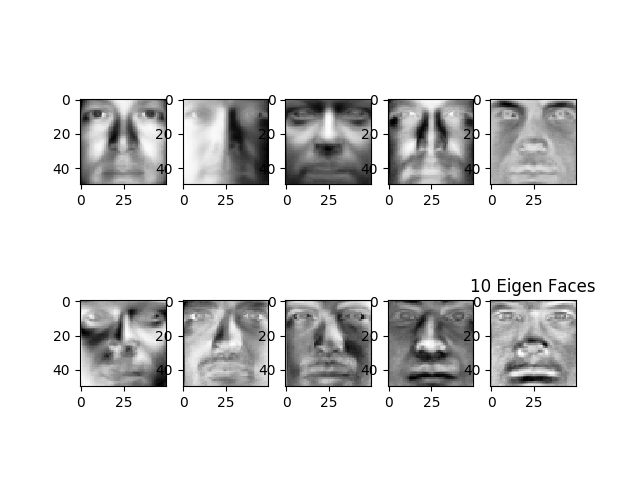

In [5]:
from PIL import Image
img = Image.open('Eigen_Faces.png')
img

# step-7 evaluating the approximation error as a function of the number of principal components (eigenfaces)
for approximation

In [ ]:
low_ranx_approximation = np.zeros(mean_subtracted_data.shape)
error = np.zeros(200)
for r in range(1, 200):
    print('Now evaluating r = '+str(r))
    Zeta = np.zeros((r,r))
    for i in range(0, r):
        Zeta[i, i] = Sigma[i]
    low_ranx_approximation = (U[:,:r].dot(Zeta)).dot(Vt[:r,:])
    for i in range(0, mean_subtracted_data.shape[0]):
        for j in range(0, mean_subtracted_data.shape[1]):
            aij = (low_ranx_approximation[i][j] - mean_subtracted_data[i][j])
            error[r-1] = error[r-1] + aij*aij
    error[r-1] = np.sqrt(error[r-1])
plt1.figure()
plt1.plot(np.linspace(1,200,200), error)
plt1.title('Error vs r')
plt1.xlabel('r ->')
plt1.ylabel('||X-X_r|| ->')
plt1.show()


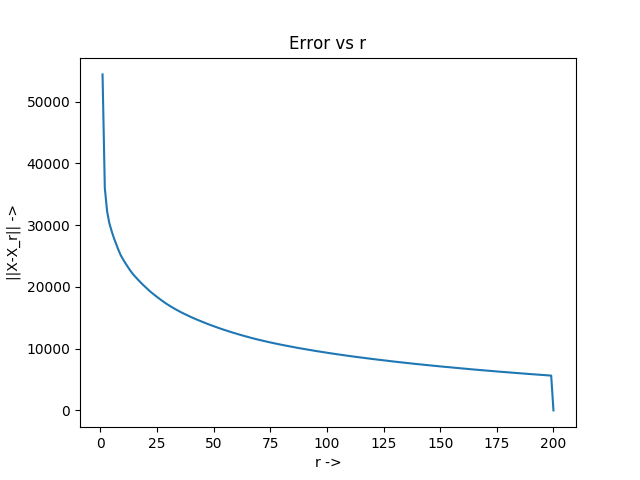

In [6]:
from PIL import Image
img = Image.open('Error.png')
img

Since Σ is a diagonal matrix with non-negative real numbers on the diagonal in non-ascending order, we can use the first r elements in Σ together with first r columns in U and first r rows in V T to approximate X . That is, we can approximate X by ˆ X r= U [:, : r ] Σ [: r , : r ] V T [: r , :]. The matrix ˆ X r is called rank- r approximation of X . Here is a plot of the rank- r approximation error ‖ X − ˆ X r ‖ F 2 as a function of r when r= 1, 2, . . . , 200.


The top r eigenfaces V T [: r , :]= { v 1 , v 2 , . . . , v r } T span an r -dimensional linear subspace of the original image space called face space , whose origin is the average face μ , and whose axes are the eigenfaces { v 1 , v 2 , . . . , v r }. Therefore, using the top r eigenfaces { v 1 , v 2 , . . . , v r }, we can represent a 2500-dimensional face image z as an r -dimensional feature vector f : f= V T [: r , :] z= [ v 1 , v 2 , . . . , v r ] T z

In order to get F , multiply X to the transpose of first r rows of V T , F should have same number of rows as X and r columns; similarly for X test

# step-8 improved facial recognition:
    by Setting r = 10 reduces the dimensionality of the data by using the top 10 eigenfaces to represent facial features in a lower-dimensional space 

In [ ]:
r = 10
print('r = ' + str(r))
F_feature_matrix_train = mean_subtracted_data.dot(pca.components_[:r, :].T)
F_feature_matrix_test, test_labels = get_feature_matrix('faces/test.txt', r, average_face, pca.components_)

# step-9  logistic regression:
 evaluates its accuracy in classifying faces in the test dataset and it provides a measure of how well the model can recognize faces using the selected eigenfaces as features.    

In [ ]:
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(F_feature_matrix_train, train_labels)

test_acc = logistic_regression_model.score(F_feature_matrix_test, test_labels)
print('Testing Accuracy : '+str(test_acc*100)+' %')


# step-10 calculates and visualizes the testing accuracy of a logistic regression
as the number of selected eigenfaces (r) varies, providing insights into the impact of dimensionality reduction on face recognition performance.

In [ ]:
Accuracy = np.zeros(200)
for r in range(1,200):
    F_feature_matrix_test, test_labels = get_feature_matrix('faces/test.txt', r, average_face, Vt)
    F_feature_matrix_train = mean_subtracted_data.dot(np.transpose(Vt[:r, :]))
    logistic_regression_model.fit(F_feature_matrix_train, train_labels)
    Accuracy[r-1] = logistic_regression_model.score(F_feature_matrix_test, test_labels)*100

plt1.figure()
plt1.title('Accuracy vs r')
plt1.xlabel('r ->')
plt1.ylabel('Accuracy(%) ->')
plt1.plot(np.linspace(1,200,200),Accuracy)
plt1.show()

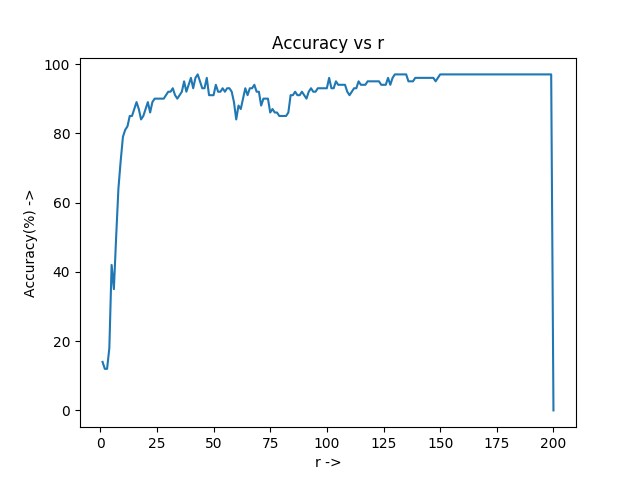

In [7]:
from PIL import Image
img = Image.open('accuracy.png')
img

We extract training and test features for r=10. We train a Logistic Regression model using F and test on F test . Now we see the plot of Accuracy vs r:
    We note that the maximum accurcy saturates at 96%. Also there is NO dip at 200, it is a faulty representation
Output
Also, the text output of code is:
r = 10
Testing Accuracy : 79.0 %

Thus at r=10, the accuracy on test data is 79%.


for recognizing any given image which is in this folder structure 
- train
    - person01
        - person01_01.png
        - person01_02.png
        - ...
    - person02
        - person02_01.png
        - person02_02.png
        - ...
    - ...
- test
    - unknown
        - image01.jpg
        - image02.jpg
        - ...
    - ...


In [ ]:
# sample of recognizing a specific image
# Define the function for recognizing an image
def Irecognize_image(image_path, pca, logistic_regression_model):
    im = Image.open(image_path)
    im = np.array(im)
    
    # Perform dimensionality reduction (PCA) on the image
    im_pca = pca.transform(im.reshape(1, -1))
    
    # Use the trained model to predict the label
    prediction = logistic_regression_model.predict(im_pca)
    return prediction[0]

# Provide the path to the image you want to recognize
image_path = 'path_to_your_image.png'

# Call the recognition function with the image path
recognized_label = Irecognize_image(image_path, pca, logistic_regression_model)

# Print the recognized label
print('Recognized Label:', recognized_label)
